# Machine Learning To Predict Heart Disease Using UCI Dataset

#### Datset Link : https://archive.ics.uci.edu/ml/datasets/heart+Disease

#### Problem Statement: Build a Machine learning model to predict heart disease from given attributes

## Details About Dataset
   
   Given Dataset contains 14 features of patient who have heart disease based on physical testing. 
   Dataset contains 303 rows mean there is 303 patient's data.

### Information about our all columns who will be the feature:

    1) age: In this feature we have the age of all 303 patients in year. So age is our Numerical feature
    2) sex: In this feature we have two values 0 amd 1, whre 1 for male and 0 for female
    3) cp: cp is nothing but chest pain 
           There are 4 values in cp feature 1,2,3 and 4, now i reserch deeply about them what are they:
           
            1 : Typical angina -> Typical angina is the discomfort that is noted when the heart does not get enough blood or     oxygen. Typically, this is caused by blockage or plaque buildup in the coronary arteries. If one or more of the coronary arteries is partially or completely clogged, the heart will not get enough oxygen.
            2 : Atypical angina ->Atypical symptoms of a heart attack may include fatigue, shortness of breath, discomfort in the throat, jaw, neck, arms, back and stomach—a feeling described almost like a muscle pull or pain. The problem may also present like indigestion or heartburn and can even mimic other gastrointestinal issues.
            3 : Non anginal pain->This anginal pain in patients who do not have heart disease. The pain typically is felt behind the breast bone (sternum) and is described as oppressive, squeezing or pressure-like.
            4 : Asymptomatic    -> Asymptomatic means neither causing nor exhibiting symptoms of disease. Symptomatic means a physical indication (rash, pain, discomfort etc.) of disease or disorder. For example, red spots are symptomatic of measles and chest pain is symptomatic of a heart attack (myocardial infarction) Where Angina is a common condition that affects several million people in the world. Yet most people aren’t aware of the different symptoms and types of this condition for men and women
    4) trestbps: trestbps is nothing but rest of blood pressure in mm Hg on admission to the hospital, this occure when our heart is take a rest, blood pressure highest when heartbeat pumping the blood. Less then 120 is normal condition, grater then 140 is high, 120 to 139 at risk, Numerical data
    5) chol : chol is nothing but serum cholestoral in mg/dl, numerical data
              desireble chol is <200 mg/dl
              200 to 239 is border
              and >240 is high
    6) fbs : Fasting blood sugar > 120 mg/dl where 1 for true and 0 for false
    7) restecg : Resting electrocardiographic results
             where result val 0: Normal
                          val 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                          val 3: Showing probable or definite left ventricular hypertrophy by Estes' criteria
    8) thalach : Achived maximum heart rate, Numerical data
    9) exang : Exercise induced angina 1 for yes and 0 for No
    10)oldpeak : ST depression induced by exercise relative to rest
    11)slope : Slope is slope of the peak exercise ST segment
               val 1 : up
               val 2 : flat
               val 3 : down
    12) thal : Thalassemia is an inherited blood disorder that causes your body to have less hemoglobin than normal.
                3 = normal; 6 = fixed defect; 7 = reversable defect
    13) target : Diagnosis of heart disease (angiographic disease status) and also this is the target of our dataset
                 where value 0 : < 50% diameter narrowing (No heart disease)
                       value 1 : > 50% diameter narrowing (Heart Disease)

### Import libraries

In [310]:
import pandas as pd
import numpy as np
import warnings
import matplotlib
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [311]:
# import dataset
data= pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [312]:
data.shape # shape of our dataset

(303, 14)

Our dataset in 303 rows and 14 columns

In [313]:
data.info() # full information about dataest

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [314]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [315]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Our dataset is balanced because 138 have no disease and 165 have a disease

### Remove duplicate Row

In [316]:
data[data.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [317]:
data = data.drop_duplicates()
data.shape

(302, 14)

##  EDA(Exploratory Data Analysis) For Catagorical and Numerical Data

In dataset there are two types of feature :
categorical feature and numerical feature 


### Categorical Data 

In [318]:
catagorical_data = data[['sex','cp','fbs','restecg','exang','slope','ca','thal','target']] 
catagorical_data.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


In [319]:
def histogram(feature):
    disease = catagorical_data[catagorical_data['target']==1][feature].value_counts()
    no_disease  = catagorical_data[catagorical_data['target']==0][feature].value_counts()
    df = pd.DataFrame([disease, no_disease])
    df.index = ['Disease','No disease']
    df.plot(kind='bar',)
    plt.ylabel('count')
    plt.title(str(feature))

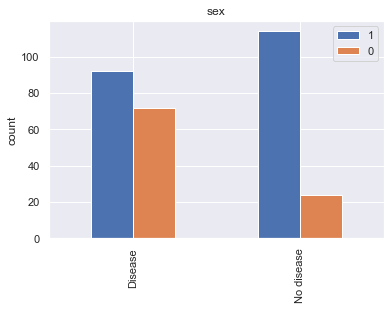

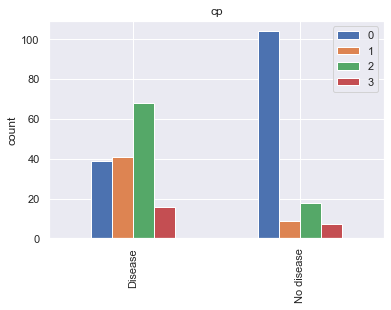

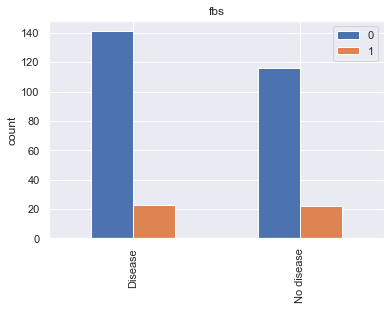

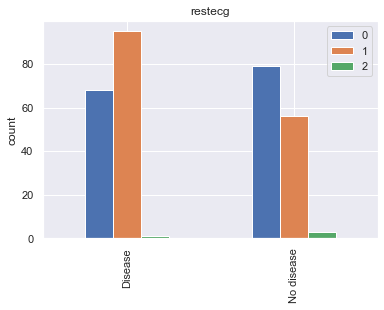

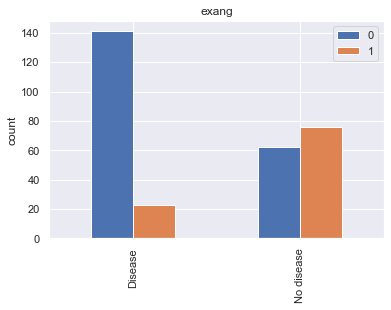

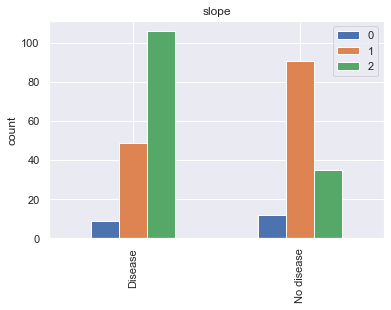

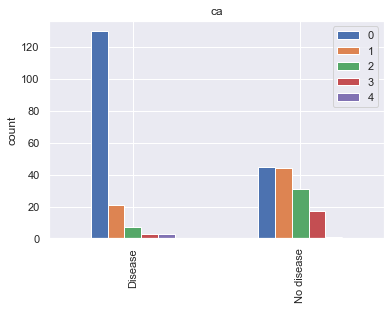

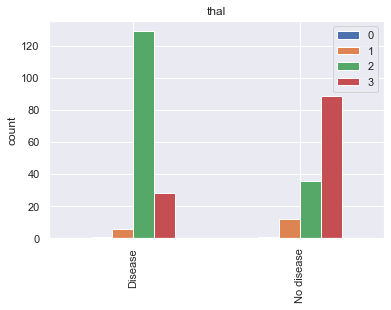

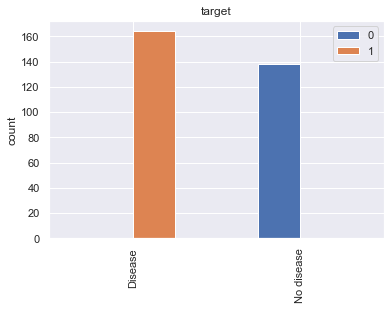

In [320]:
for i in catagorical_data:
    histogram(i)

#### explanation of bar graph
    1) sex column we can see female have a more disease then a men.
    2) Non anginal type chest pain in more disease and typical type in less disease
    3) fbs in we can't see anything so may be this feature will be the droped or this is non correlated feature
    4) restecg is when 1 then more disease
    5) exang 0 then disease is more
    6) slope is down then disease is more
    7) ca is number of major vassel and when this is high  disease occure
    8) Thalassemia fixed deffect then disease and reversable disease in no more disease

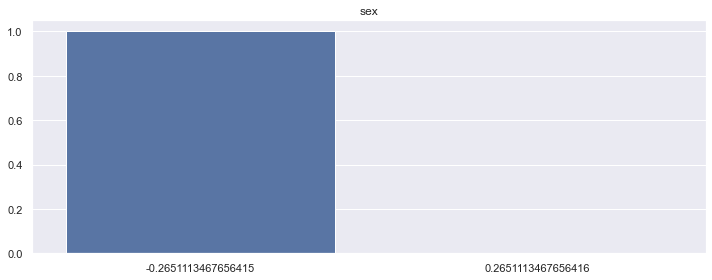

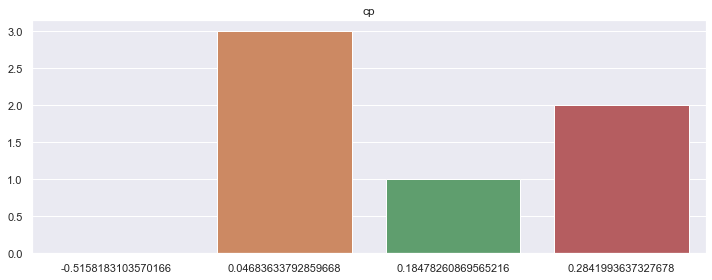

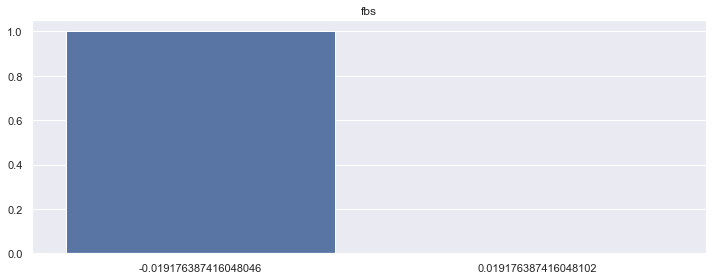

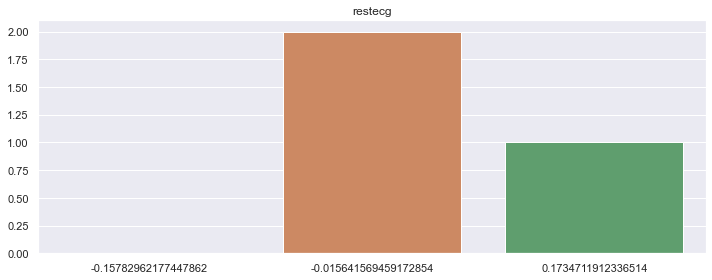

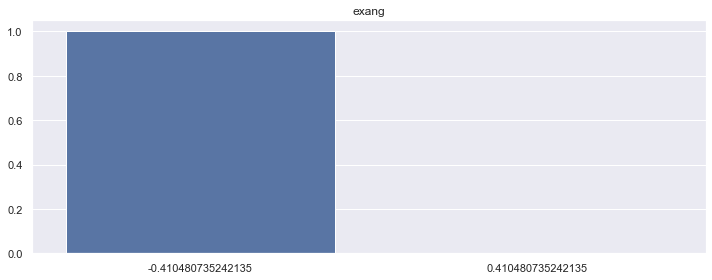

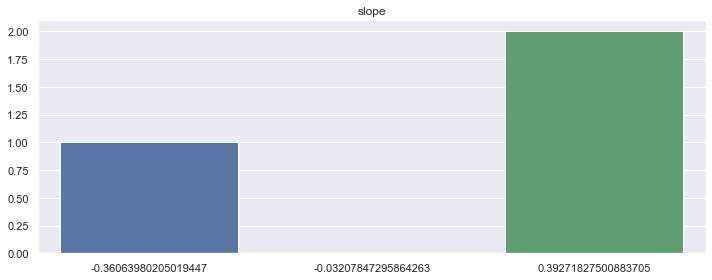

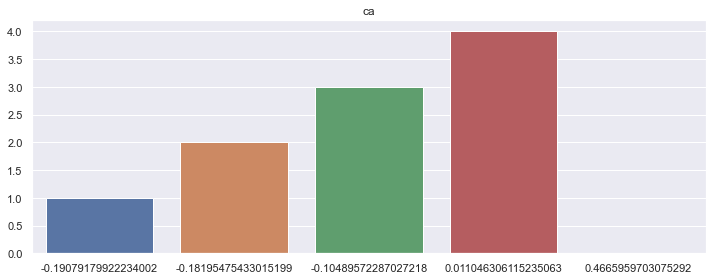

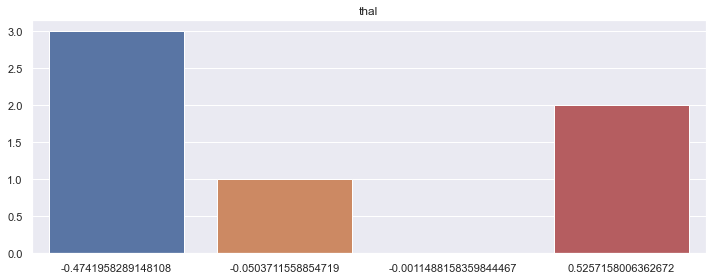

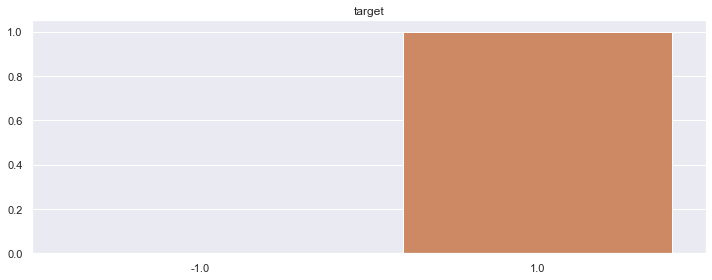

In [321]:
for col in catagorical_data:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    disease = data.loc[data.target.values == 1, col].value_counts() 
    no_disease = data.loc[data.target.values == 0, col].value_counts()
    
    all_counts = list(set(list(disease.index) + list(no_disease.index)))
    
    #Counts of how often each outcome was recorded.
    freq_dis = (data.target.values == 1).sum()
    freq_no_dis = (data.target.values == 0).sum()
    
    disease = disease.to_dict()
    no_disease = no_disease.to_dict()
    
    all_index = list(all_counts)
    all_counts = [disease.get(k, 0) / freq_dis - no_disease.get(k, 0) / freq_no_dis for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

For good understanding

###  Numerical Data

In [322]:
numerical_data = data[['age','trestbps','chol','thalach','oldpeak','target']]
numerical_data.head()

,age,trestbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1


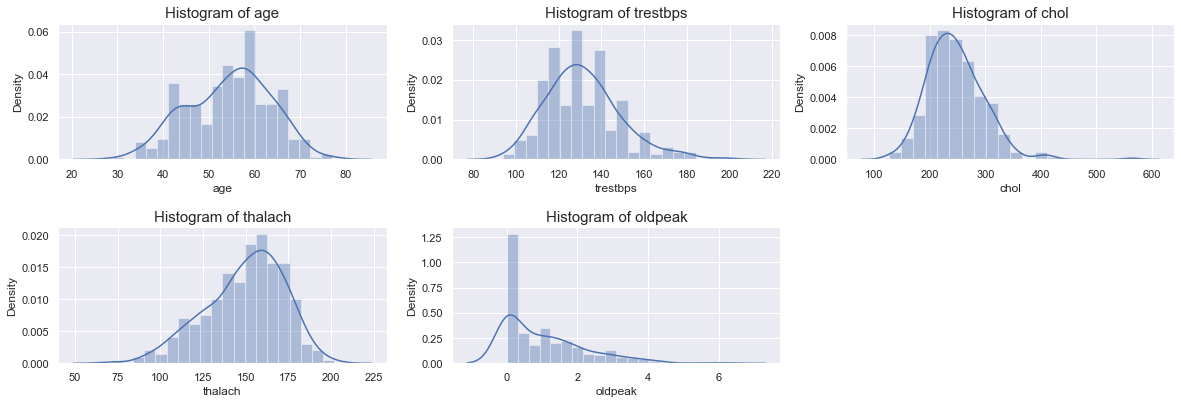

In [323]:
plt.figure(figsize=(20,10))
for i, j in enumerate(numerical_data.drop('target',axis=1)):
    plt.subplot(3,3,i+1)
    plt.title(f'Histogram of {j}', fontsize= 15)
    sns.distplot(numerical_data[j], bins=20)
plt.subplots_adjust(hspace=0.5)

### numerical data explaination from graph
     1) More patient is in between 40 to 70
     2) Trestbps is rightside skewed and majority are 120 to 145
     3) cholestrol feature is also right side skewed and majority is between 200 to 350
     4) Thalach is left side skewed
     5) high oldpeak are in 0 to 4 with right side skewed

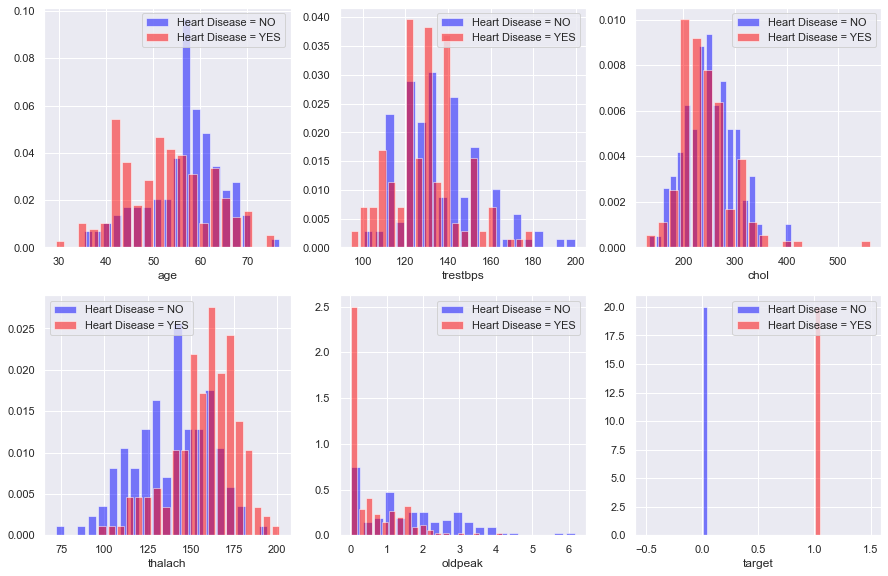

In [324]:
def overall_analysis(data):
    plt.figure(figsize=(15, 15))
    for i, column in enumerate(data, 1):
        plt.subplot(3, 3, i)
        data[data.target == 0][column].hist(bins=20, color='blue', label='Heart Disease = NO', alpha=0.5, rwidth=0.8, density=True)
        data[data.target == 1][column].hist(bins=20, color='red', label='Heart Disease = YES', alpha=0.5, rwidth=0.8, density=True)
        plt.legend()
        plt.xlabel(column)
overall_analysis(numerical_data)

Overall analysisis to we can watch all catagorical data in when disease is occur and when not disease.

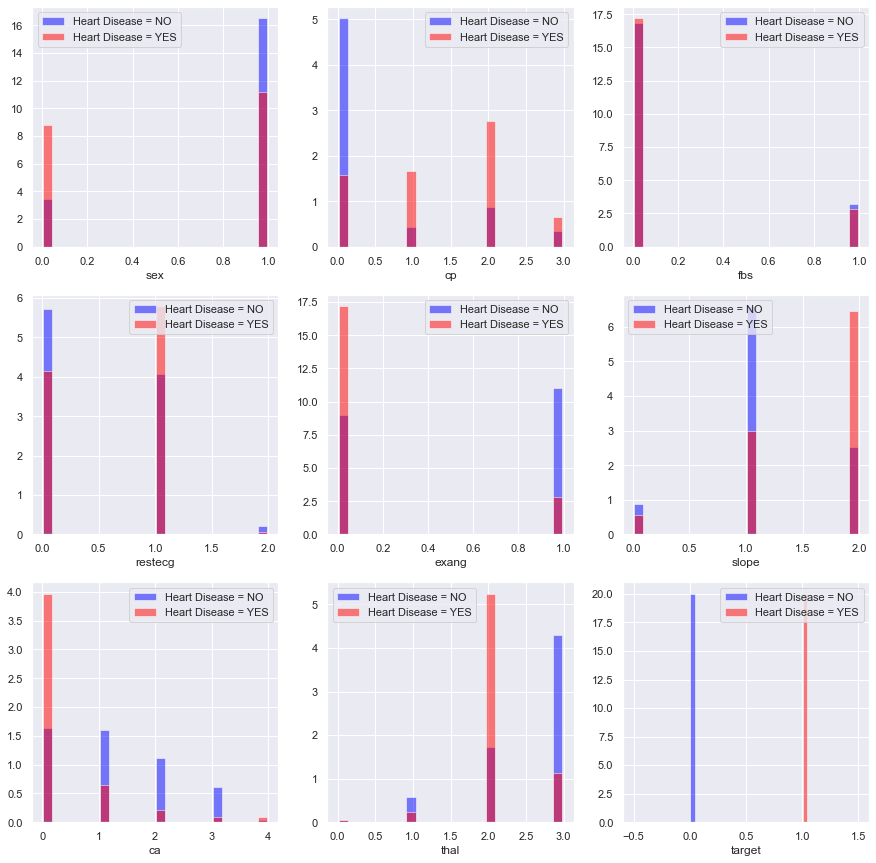

In [325]:
overall_analysis(catagorical_data)

we can't say more from this dataset

## Skewness

In [326]:
from scipy.stats import norm # for plot a line , can use distplot also
def skewness(data, feature): 
    plt.figure(figsize=(6,3))
    plt.hist(data[feature], bins=20, rwidth=0.8, density=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    rng = np.arange(data[feature].min(), data[feature].max())
    plt.plot(rng, norm.pdf(rng,data[feature].mean(),data[feature].std()))

### Skewness For Catagorical Data

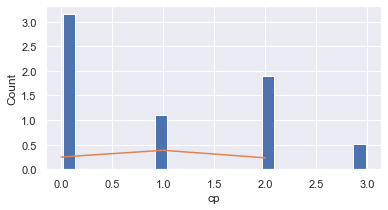

In [327]:
skewness(catagorical_data,'cp') 

cp feature is Right side skewed  

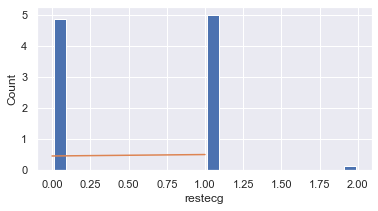

In [328]:
skewness(catagorical_data,'restecg')

Restecg have very less value of 2

In [329]:
catagorical_data[catagorical_data.restecg==2] # there are only for values of 

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
144,0,2,0,2,0,1,0,2,1
266,0,0,0,2,1,1,0,2,0
289,0,0,0,2,1,1,1,3,0
291,1,0,0,2,0,0,3,1,0


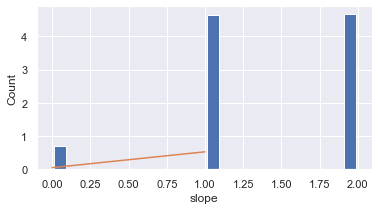

In [330]:
skewness(catagorical_data,'slope')

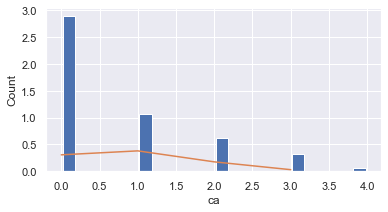

In [331]:
skewness(catagorical_data,'ca')

ca feature is right side skewed

In [332]:
catagorical_data[catagorical_data.ca>3.5 ] # there is only four rows who have ca>3.5

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
92,1,2,0,1,0,2,4,2,1
158,1,1,0,1,0,1,4,3,1
163,1,2,0,1,0,2,4,2,1
251,1,0,1,0,1,1,4,3,0


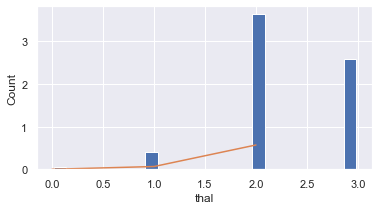

In [333]:
skewness(catagorical_data,'thal')

thal feature is left side skewed and there is two rows have ca<1

In [334]:
catagorical_data[catagorical_data.thal<1] 

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
48,0,2,0,0,0,2,0,0,1
281,1,0,1,1,1,1,0,0,0


### Skewness for Numerical Data

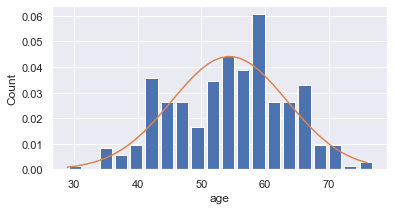

In [335]:
skewness(numerical_data,'age')

In [336]:
numerical_data[numerical_data.age<30] 
# under age 35 we have 3 field of data 
# our dataset is to small so we can't drop all 3 field
# so we only drop age less then 30 field 

,age,trestbps,chol,thalach,oldpeak,target
72,29,130,204,202,0.0,1


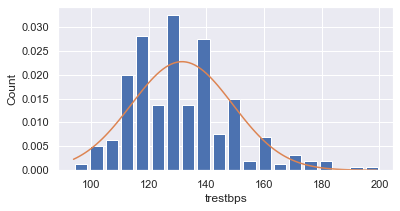

In [337]:
skewness(numerical_data,'trestbps')

Right side skewed so check how many trestbps are greter then 180

In [338]:
numerical_data[numerical_data.trestbps>180] # there is only 2 rows where trestbps is > 180

,age,trestbps,chol,thalach,oldpeak,target
223,56,200,288,133,4.0,0
248,54,192,283,195,0.0,0


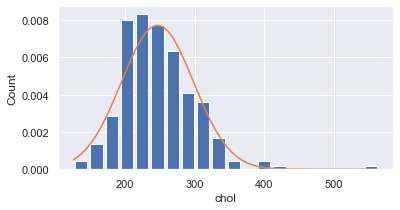

In [339]:
skewness(numerical_data,'chol')

chol feature is right side skewed so checkwhich data have value more ten 400

In [340]:
numerical_data[numerical_data.chol>420] # only one row

,age,trestbps,chol,thalach,oldpeak,target
85,67,115,564,160,1.6,1


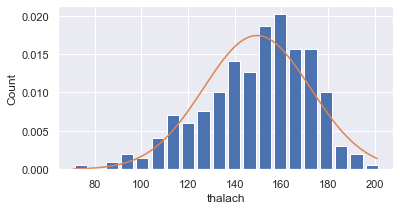

In [341]:
skewness(numerical_data,'thalach')

In [342]:
numerical_data[numerical_data.thalach<90]


,age,trestbps,chol,thalach,oldpeak,target
243,57,152,274,88,1.2,0
272,67,120,237,71,1.0,0


In [343]:
numerical_data.thalach.mean()

149.56953642384107

In [344]:
numerical_data.thalach.std()

22.90352725196984

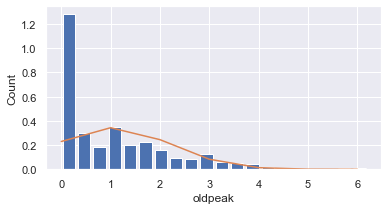

In [345]:
skewness(numerical_data,'oldpeak')

Oldpeak is right side skewed so check where is oldpeak is >4 so ay they all are our outliers

In [346]:
numerical_data[numerical_data.oldpeak>4] 

,age,trestbps,chol,thalach,oldpeak,target
101,59,178,270,145,4.2,1
204,62,160,164,145,6.2,0
221,55,140,217,111,5.6,0
250,51,140,298,122,4.2,0
291,58,114,318,140,4.4,0


## Correlation
     
Correlation deifine which feature are correlated with our target feature

In [347]:
# correlation bar plot with 'target ' features
def correlation_bar_plot(data):
    sns.set()
    plt.figure(figsize=(10,6))
    plt.title('Correlation Bar Plot of Target Features', fontsize= 20)
    df = data.drop('target', axis=1)
    axis = sns.barplot(df.columns,df.corrwith(data.target))
    axis.tick_params(labelsize=15, labelrotation = 20)

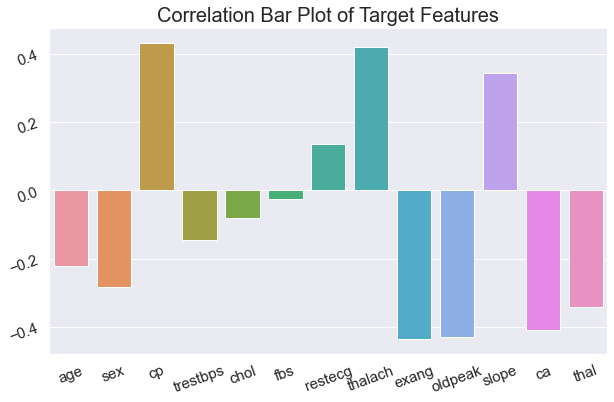

In [348]:
correlation_bar_plot(data) 

Using barplot chart we can easily understand that fbs feature is totally non correlated with our target so we can drop, wihout drop this column can't get good accuracy of our future model.
Also we can drop chol and restecg column.
Highly correlated column are cp, thalach, exang, oldpeak, ca.

In [349]:
corr = data.corr().sort_values(by='target', ascending=False)
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
target,-0.221476,-0.283609,0.432080,-0.146269,-0.081437,-0.026826,0.134874,0.419955,-0.435601,-0.429146,0.343940,-0.408992,-0.343101,1.000000
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
slope,-0.164124,-0.032990,0.116854,-0.122873,0.000417,-0.058654,0.090402,0.384754,-0.256106,-0.576314,1.000000,-0.092236,-0.103314,0.343940
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609


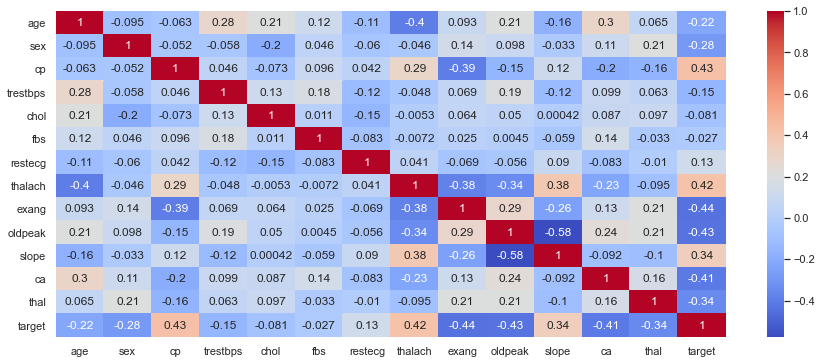

In [350]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm');

we can see that exang, oldpeak, ca, thal feature are negatively correlated with target. where cp,thalach and slope are positively correlated with target

In [351]:
# fbs droped because of non correlated and fbs will loss our model accuracy
corr_data = data.drop(['fbs'], axis=1)
corr_data.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1


### Removing Outliers

In [352]:
def IQR(df,x):
    q1 = df[x].quantile(0.25)
    q3 = df[x].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    cleaned_data = df.loc[(df[x] > fence_low) & (df[x] < fence_high)]
    return cleaned_data

Using IQR for removing outliers from dataset

In [353]:
print(f'shape of data {corr_data.shape}')
print()
print(f'{corr_data.columns}')

shape of data (302, 13)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [354]:
clean  = IQR(corr_data,'age')
clean.shape # no outlier find from iqr in age

(302, 13)

In [355]:
clean  = IQR(clean,'sex')
clean.shape  # no outlier find from iqr in sex

(302, 13)

In [356]:
clean  = IQR(clean,'cp')
clean.shape # no outlier find from iqr in cp

(302, 13)

In [357]:
clean  = IQR(clean,'trestbps')
clean.shape # many outlier find from iqr in trestbps

(289, 13)

In [358]:
clean  = IQR(clean,'restecg')
clean.shape # no outlier find from iqr in restecg

(289, 13)

In [359]:
clean  = IQR(clean,'thalach')
clean.shape # one outlier find from iqr in thalach

(288, 13)

In [360]:
clean  = IQR(clean,'exang')
clean.shape # no outlier find from iqr in exang

(288, 13)

In [361]:
clean  = IQR(clean,'oldpeak')
clean.shape # 6 outlier find from iqr in oldpeak and droped all

(282, 13)

In [362]:
clean  = IQR(clean,'slope')
clean.shape # no outlier find from iqr in slope

(282, 13)

In [363]:
clean  = IQR(clean,'ca')
clean.shape # 20 outlier find from iqr in age and droped all

(262, 13)

In [364]:
clean  = IQR(clean,'thal')
clean.shape # 2 outlier find from iqr in thal

(260, 13)

In [365]:
clean  = IQR(clean,'chol')
clean.shape # 4 outlier find from iqr in chol

(256, 13)

In [366]:
clean.head() # look our clean dataset 

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1


### EDA for clean Dataset

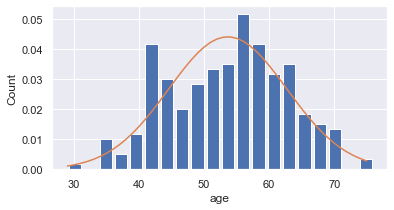

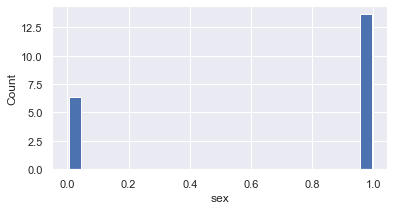

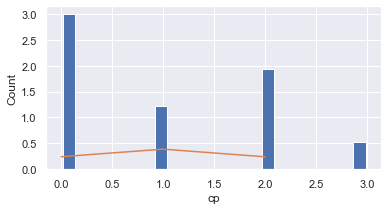

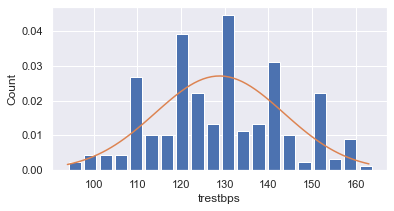

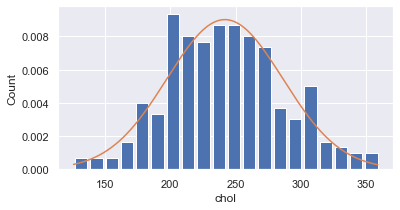

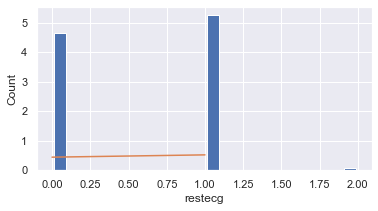

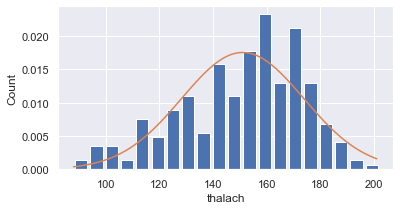

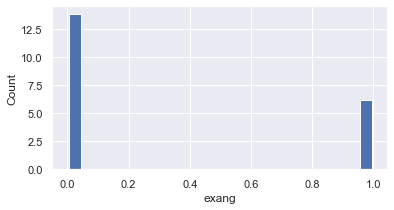

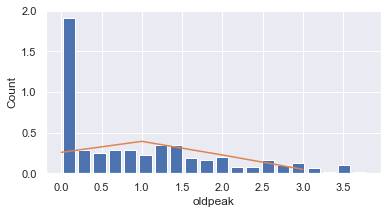

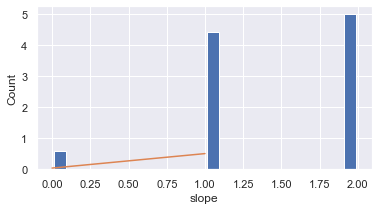

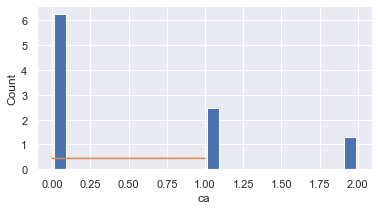

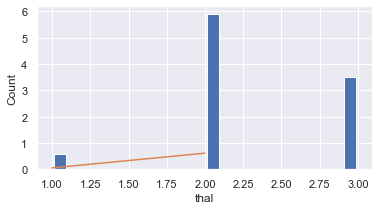

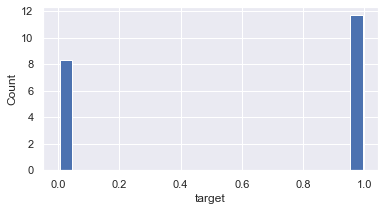

In [367]:
for col in clean:
    skewness(clean,col)

There is some skewness in all of numerical data. so we use standard scaler to control them

## Encoding catagorical values to numeric

In [368]:
clean_cat =clean[['age','trestbps','thalach','oldpeak','chol']]

In [369]:
# using standardscaler
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(clean_cat)
X[:5]

array([[ 1.03287666,  1.10234788, -0.0455732 ,  1.35565388, -0.20039529],
       [-1.8376148 ,  0.08135997,  1.58336775,  2.54417235,  0.18430709],
       [-1.39600073,  0.08135997,  0.92298628,  0.46426503, -0.8566523 ],
       [ 0.26005204, -0.59929863,  1.18713887, -0.12999421, -0.13250664],
       [ 0.37045555, -0.59929863,  0.5267574 , -0.32808062,  2.53778052]])

X is numpy.ndarray so we would like to make a dataframe

In [370]:
type(X)  

numpy.ndarray

In [371]:
scaler_data = pd.DataFrame(X, index=clean_cat.index, columns=clean_cat.columns)
scaler_data.head()

,age,trestbps,thalach,oldpeak,chol
0,1.032877,1.102348,-0.045573,1.355654,-0.200395
1,-1.837615,0.081360,1.583368,2.544172,0.184307
2,-1.396001,0.081360,0.922986,0.464265,-0.856652
3,0.260052,-0.599299,1.187139,-0.129994,-0.132507
4,0.370456,-0.599299,0.526757,-0.328081,2.537781


### EDA of scaler data

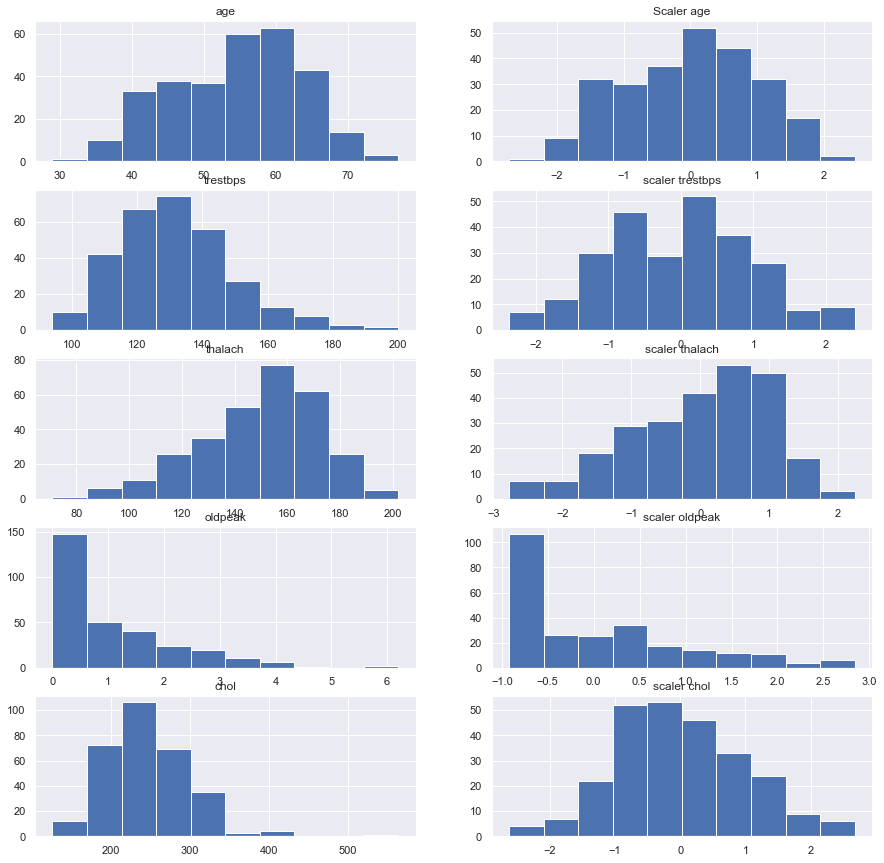

In [372]:
fig, axs = plt.subplots(5, 2,figsize=(15, 15))
axs[0, 0].hist(numerical_data["age"])
axs[0, 0].set_title("age")
axs[0, 1].hist(scaler_data["age"])
axs[0, 1].set_title("Scaler age")
axs[1, 0].hist(numerical_data["trestbps"])
axs[1, 0].set_title("trestbps")
axs[1, 1].hist(scaler_data["trestbps"])
axs[1, 1].set_title("scaler trestbps")
axs[2, 0].hist(numerical_data["thalach"])
axs[2, 0].set_title("thalach")
axs[2, 1].hist(scaler_data["thalach"])
axs[2, 1].set_title("scaler thalach")
axs[3, 0].hist(numerical_data['oldpeak'])
axs[3, 0].set_title("oldpeak")
axs[3, 1].hist(scaler_data['oldpeak'])
axs[3, 1].set_title('scaler oldpeak')
axs[4, 0].hist(numerical_data['chol'])
axs[4, 0].set_title('chol')
axs[4, 1].hist(scaler_data['chol'])
axs[4, 1].set_title('scaler chol')
plt.show();

There is the glass of scalled data vs our egular numerical data

In [373]:
ohe_data = clean[['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']] # for convert dummies data

In [374]:
ohe_data.head()

,sex,cp,restecg,exang,slope,ca,thal
0,1,3,0,0,0,0,1
1,1,2,1,0,0,0,2
2,0,1,0,0,2,0,2
3,1,1,1,0,2,0,2
4,0,0,1,1,2,0,2


In [375]:
# Data Encoding
# for use of one hot encoding
for i in ohe_data:
    ohe_data[i] =ohe_data[i].astype(object)
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 302
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sex      256 non-null    object
 1   cp       256 non-null    object
 2   restecg  256 non-null    object
 3   exang    256 non-null    object
 4   slope    256 non-null    object
 5   ca       256 non-null    object
 6   thal     256 non-null    object
dtypes: object(7)
memory usage: 16.0+ KB


In [376]:
dummies = pd.get_dummies(ohe_data, drop_first=True) # get dummies to make dummy column

In [377]:
dummies.head()

,sex_1,cp_1,cp_2,cp_3,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,thal_2,thal_3
0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0,0,1,0
3,1,1,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,1,0,1,0,0,1,0


In [378]:
new_data = pd.concat([scaler_data, dummies],axis=1) 
new_data.head()  # concat our scalerdata and dummies data

,age,trestbps,thalach,oldpeak,chol,sex_1,cp_1,cp_2,cp_3,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,thal_2,thal_3
0,1.032877,1.102348,-0.045573,1.355654,-0.200395,1,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.837615,0.081360,1.583368,2.544172,0.184307,1,0,1,0,1,0,0,0,0,0,0,1,0
2,-1.396001,0.081360,0.922986,0.464265,-0.856652,0,1,0,0,0,0,0,0,1,0,0,1,0
3,0.260052,-0.599299,1.187139,-0.129994,-0.132507,1,1,0,0,1,0,0,0,1,0,0,1,0
4,0.370456,-0.599299,0.526757,-0.328081,2.537781,0,0,0,0,1,0,1,0,1,0,0,1,0


In [379]:
new_data['target'] = data.target # add target columnin new_data

In [380]:
new_data.head()

,age,trestbps,thalach,oldpeak,chol,sex_1,cp_1,cp_2,cp_3,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,thal_2,thal_3,target
0,1.032877,1.102348,-0.045573,1.355654,-0.200395,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,-1.837615,0.081360,1.583368,2.544172,0.184307,1,0,1,0,1,0,0,0,0,0,0,1,0,1
2,-1.396001,0.081360,0.922986,0.464265,-0.856652,0,1,0,0,0,0,0,0,1,0,0,1,0,1
3,0.260052,-0.599299,1.187139,-0.129994,-0.132507,1,1,0,0,1,0,0,0,1,0,0,1,0,1
4,0.370456,-0.599299,0.526757,-0.328081,2.537781,0,0,0,0,1,0,1,0,1,0,0,1,0,1


In [381]:
new_data.shape

(256, 19)

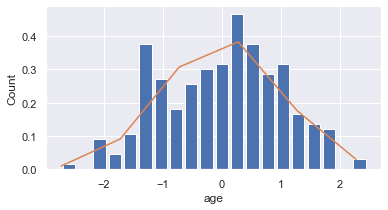

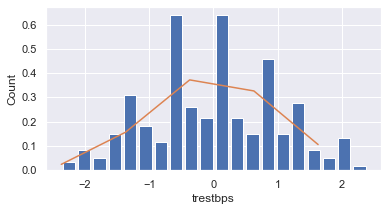

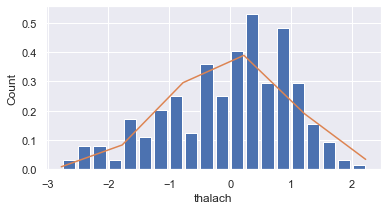

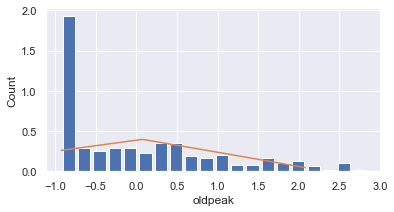

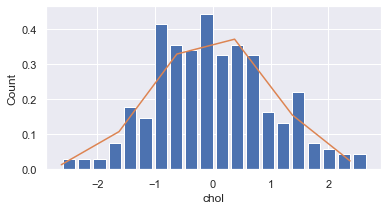

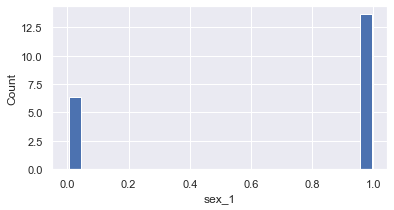

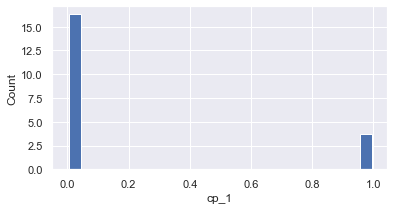

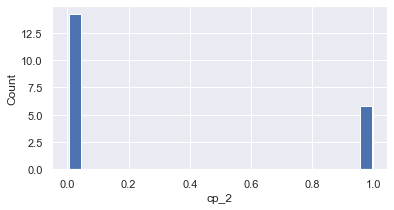

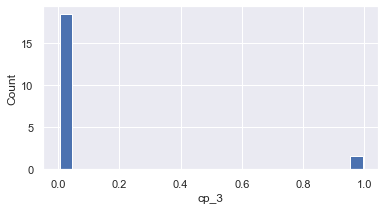

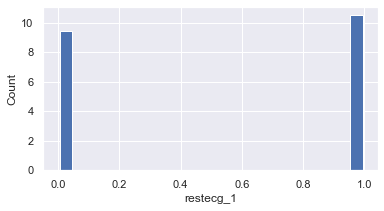

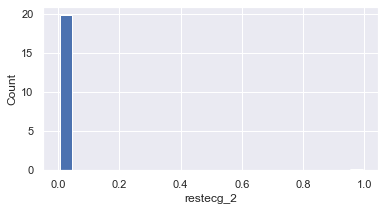

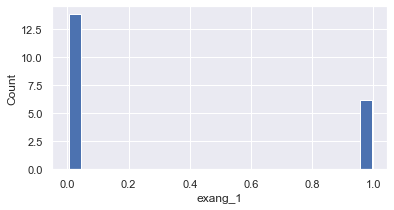

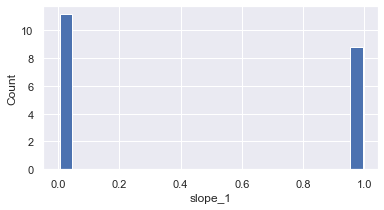

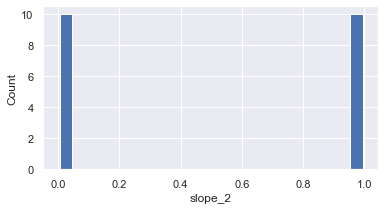

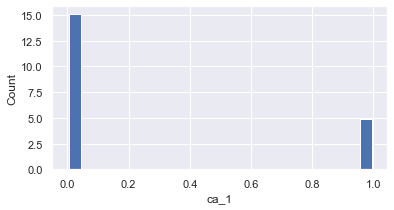

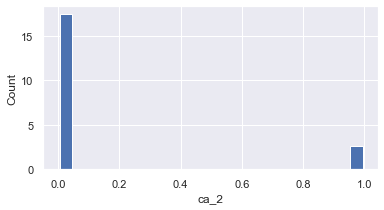

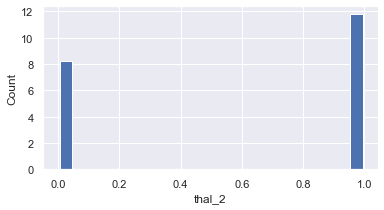

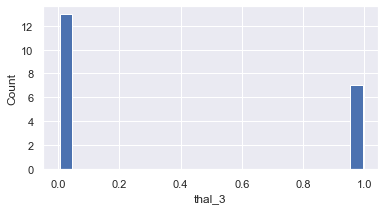

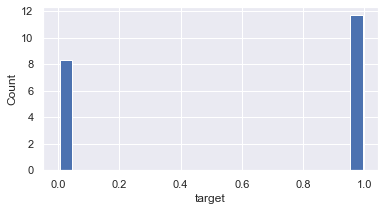

In [382]:
for col in new_data:
    skewness(new_data,col)

## Split data in training and testing set

In [383]:
from sklearn.model_selection import train_test_split

In [384]:
X = new_data.drop('target', axis=1)
y =new_data.target

In [385]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=10) # training size is 0.75

In [386]:
X_train.shape # shape of training data

(192, 18)

In [387]:
X_test.shape # shape of testing data

(64, 18)

# Model Building

In [388]:
# import liberaries
# import GridserchCV for hyperparameter tuning
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### Hyperparameter Tuning

In [389]:
# make a dictionary of parameter so it will easy to run 
model_params = {
    'svm' :{
        'model' : SVC(),
        'params' : { 
            'C':[1,10,20],
            'kernel' : ['rbf','linear','poly','sigmoid'],
            'gamma':['auto','scale'],
            'decision_function_shape':['ovo','ovr']}
    },
    'logistic_regression':{
        'model': LogisticRegression(n_jobs=5),
        'params': {
            'C':  [1,5,10],
            'penalty': ['l1', 'l2', 'elasticnet'],
            'solver' : ['liblinear','newton-cg','lbfgs','sag','saga'],
            'max_iter':[1,10,20,50,100,150],
            'multi_class':['auto','ovr','multinomial']}
    },
    'gaussianNB' : {
        'model' : GaussianNB(),
        'params':{ 
            'var_smoothing':[1e-09]
        }
    },
    'BernoulliNB' : {
        'model': BernoulliNB(),
        'params': {
            'alpha':[0,1.0], 
            'binarize':[0.0],
        }
    },
    'MlP classifier':{
        'model': MLPClassifier(),
        'params':{
            'activation':['identity','logistic','tanh','relu'],
            'solver': ['lbfgs','sgd','adam'],
            'learning_rate':['constant','invscaling','adaptive'],
            
        }
    }
}

In [390]:
scores = [] # for future dataframe of score so we can visulize in well better form accuracy and our best parameter
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv = 5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [391]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.839744,"{'C': 1, 'decision_function_shape': 'ovo', 'ga..."
1,logistic_regression,0.851433,"{'C': 1, 'max_iter': 10, 'multi_class': 'multi..."
2,gaussianNB,0.840196,{'var_smoothing': 1e-09}
3,BernoulliNB,0.812670,"{'alpha': 0, 'binarize': 0.0}"
4,MlP classifier,0.843816,"{'activation': 'tanh', 'learning_rate': 'invsc..."


We have the dataframe of our best model with the best parameter of the model. But we will also watch default model and with parameter model

   ### Model Building funtion

In [392]:
train_acc =[]
test_acc=[]
mod_name=[]
def model_build_asses(model, name='Default'): # model building function
    import seaborn as sns
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    cf_matrix = confusion_matrix(y_test, preds)
    heatmap  = sns.heatmap(cf_matrix, annot=True,fmt='g',cmap="YlGnBu")
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values") 
    plt.show()
    print("\n",'Model Name:- ', name, '\n',
            "Model Train Accuracy:" ,  model.score(X_train, y_train),"\n",
            'Model Test` Accuracy:', round(accuracy_score(y_test, preds), 2), '\n',
        )
    mod_name.append(name)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(round(accuracy_score(y_test, preds), 2))

### Logistic Regression

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.89      0.94      0.92        36

    accuracy                           0.91        64
   macro avg       0.91      0.90      0.90        64
weighted avg       0.91      0.91      0.91        64



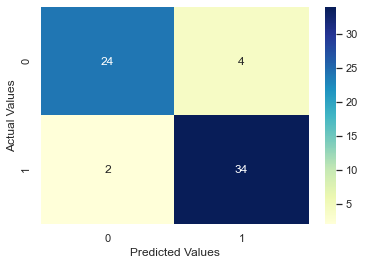


 Model Name:-  Logistic Regression 
 Model Train Accuracy: 0.8697916666666666 
 Model Test` Accuracy: 0.91 



In [393]:
lg = LogisticRegression()
model_build_asses(lg,'Logistic Regression')

In [394]:
df.best_params[1]

{'C': 1,
 'max_iter': 10,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'sag'}

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.89      0.94      0.92        36

    accuracy                           0.91        64
   macro avg       0.91      0.90      0.90        64
weighted avg       0.91      0.91      0.91        64



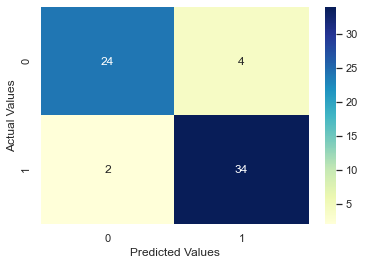


 Model Name:-  Logistic Regression Hyp 
 Model Train Accuracy: 0.8645833333333334 
 Model Test` Accuracy: 0.91 



In [395]:
lg1 = LogisticRegression(C=1,max_iter=10,multi_class='ovr',penalty='l2',solver='sag')
model_build_asses(lg1,'Logistic Regression Hyp')

### Support Vector Machine

              precision    recall  f1-score   support

           0       0.94      0.57      0.71        28
           1       0.74      0.97      0.84        36

    accuracy                           0.80        64
   macro avg       0.84      0.77      0.78        64
weighted avg       0.83      0.80      0.79        64



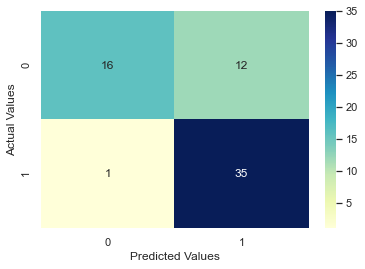


 Model Name:-  SVM 
 Model Train Accuracy: 0.8958333333333334 
 Model Test` Accuracy: 0.8 



In [396]:
sv = SVC()
model_build_asses(sv, 'SVM')

In [397]:
df.best_params[0]

{'C': 1, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}

              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.89      0.92      0.90        36

    accuracy                           0.89        64
   macro avg       0.89      0.89      0.89        64
weighted avg       0.89      0.89      0.89        64



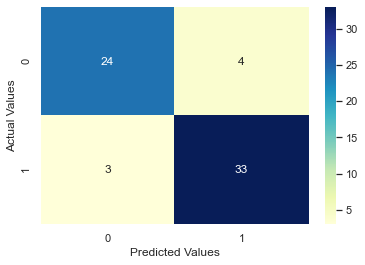


 Model Name:-  SVM Hyp 
 Model Train Accuracy: 0.8802083333333334 
 Model Test` Accuracy: 0.89 



In [398]:
sv1 = SVC(C=100,decision_function_shape='ovo',gamma='auto',kernel='linear')
model_build_asses(sv1,'SVM Hyp')

## Naive Bayes

### GausianNB

              precision    recall  f1-score   support

           0       0.63      0.96      0.76        28
           1       0.95      0.56      0.70        36

    accuracy                           0.73        64
   macro avg       0.79      0.76      0.73        64
weighted avg       0.81      0.73      0.73        64



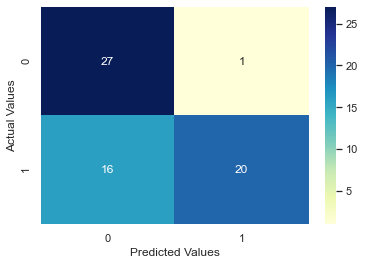


 Model Name:-  Gaussian Naive Bayes 
 Model Train Accuracy: 0.6510416666666666 
 Model Test` Accuracy: 0.73 



In [399]:
gnb  = GaussianNB(var_smoothing=1e-09)
model_build_asses(gnb,'Gaussian Naive Bayes')

### BernoulliNb

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.87      0.92      0.89        36

    accuracy                           0.88        64
   macro avg       0.88      0.87      0.87        64
weighted avg       0.88      0.88      0.87        64



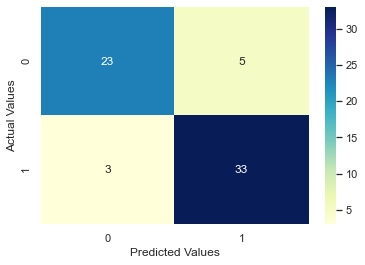


 Model Name:-  BernoulliNb 
 Model Train Accuracy: 0.8177083333333334 
 Model Test` Accuracy: 0.88 



In [400]:
bnb = BernoulliNB()
model_build_asses(bnb,'BernoulliNb')

### MLPClassifier


              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.86      0.89      0.88        36

    accuracy                           0.86        64
   macro avg       0.86      0.86      0.86        64
weighted avg       0.86      0.86      0.86        64



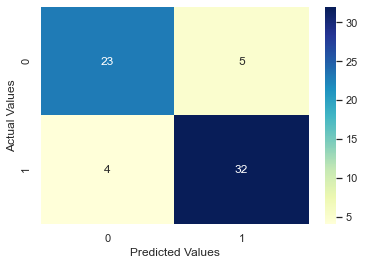


 Model Name:-  MLPClassifier 
 Model Train Accuracy: 0.90625 
 Model Test` Accuracy: 0.86 



In [401]:
mlp = MLPClassifier()
model_build_asses(mlp,'MLPClassifier')

In [402]:
df.best_params[4]

{'activation': 'tanh', 'learning_rate': 'invscaling', 'solver': 'adam'}

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.87      0.92      0.89        36

    accuracy                           0.88        64
   macro avg       0.88      0.87      0.87        64
weighted avg       0.88      0.88      0.87        64



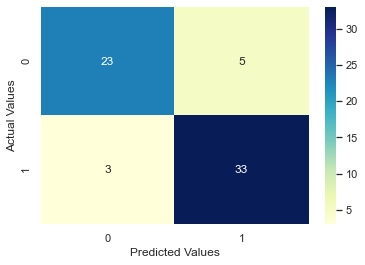


 Model Name:-  MLPClassifier Hyp 
 Model Train Accuracy: 0.875 
 Model Test` Accuracy: 0.88 



In [403]:
mlp1 = MLPClassifier(activation='identity',learning_rate='invscaling',solver='adam')
model_build_asses(mlp1,'MLPClassifier Hyp')

### Random Forest

              precision    recall  f1-score   support

           0       0.84      0.57      0.68        28
           1       0.73      0.92      0.81        36

    accuracy                           0.77        64
   macro avg       0.79      0.74      0.75        64
weighted avg       0.78      0.77      0.76        64



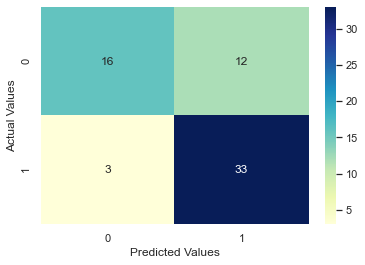


 Model Name:-  Random Forest 
 Model Train Accuracy: 0.984375 
 Model Test` Accuracy: 0.77 



In [404]:
from sklearn.ensemble import RandomForestClassifier
rforest=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rforest, param_grid=param_grid, cv= 5)
model_build_asses(CV_rfc, 'Random Forest')

In [405]:
score_table = pd.DataFrame(list(zip(mod_name, train_acc,test_acc)), columns=['name','Train_Accuracy','Test_accuracy'])
score_table=score_table.sort_values(by=['Test_accuracy'], ascending=False)
score_table


,name,Train_Accuracy,Test_accuracy
0,Logistic Regression,0.869792,0.91
1,Logistic Regression Hyp,0.864583,0.91
3,SVM Hyp,0.880208,0.89
5,BernoulliNb,0.817708,0.88
7,MLPClassifier Hyp,0.875000,0.88
6,MLPClassifier,0.906250,0.86
2,SVM,0.895833,0.80
8,Random Forest,0.984375,0.77
4,Gaussian Naive Bayes,0.651042,0.73


###  Model Evaluation 

ROC index on test for `Logistic regression`: 0.9543650793650793


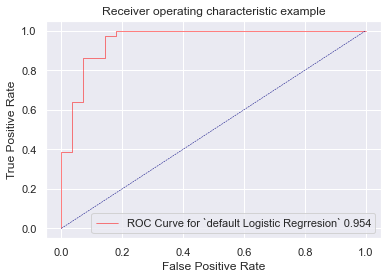

In [408]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba_lr = lg.predict_proba(X_test)
roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
print("ROC index on test for `Logistic regression`:", roc_index_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `default Logistic Regrresion` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="best");

### log loss

In [413]:
# log loss measures the performance of a classification model, perfect model have 0 log loss.
from sklearn.metrics import log_loss
#  predict_proba returns estimates for all classes
y_predict_prob = lg.predict_proba(X_test)
print(y_predict_prob[0:5])
print("\nLog Loss:  {:3.4}".format(log_loss(y_test, y_predict_prob)))

[[0.445742   0.554258  ]
 [0.42164627 0.57835373]
 [0.03755566 0.96244434]
 [0.93816969 0.06183031]
 [0.26220013 0.73779987]]

Log Loss:  0.3131


### Exporting Final Cleaned data, Training data, Testing data and Prediction generated by the model on Testing Data

In [409]:
# Exporting cleaned data
new_data.reset_index().to_csv("clean_data.csv",index=False)

In [411]:
# Export training and testing data
training_data = pd.concat([X_train,y_train],axis=1)
testing_data = pd.concat([X_test,y_test],axis=1)
training_data.reset_index().to_csv("training.csv",index=False)
testing_data.reset_index().to_csv("testing.csv",index=False)